In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

In [2]:
training_data = cmn.get_stringless_training_data()
testing_data = cmn.get_stringless_testing_data()
display(training_data.head(), testing_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


# Forest regression starts here

In [3]:
X_train = training_data.iloc[:,:-1]
y_train = training_data.iloc[:,-1:]
display(X_train.shape, X_train.head(), y_train.shape, y_train.head(10))

(1460, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


(1460, 1)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [4]:
X_test = testing_data
y_test = []
display(X_test.head(), y_test)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


[]

In [5]:
forest1 = RandomForestRegressor()
forest1.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [6]:
sns.set_context("paper")
sns.set_style("ticks")

# Random Forest Model Prediction for 50% of missing housing data

should we add an averaging model to this as there is some variance as high as 2% when rerunning the randomforest model


In [7]:
print("model score on training data:", forest1.score(X_train, y_train))
y_predicted = forest1.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.9813064280779727


array([127852.  , 154938.5 , 177382.14, ..., 155444.12, 109386.04,
       230468.56])

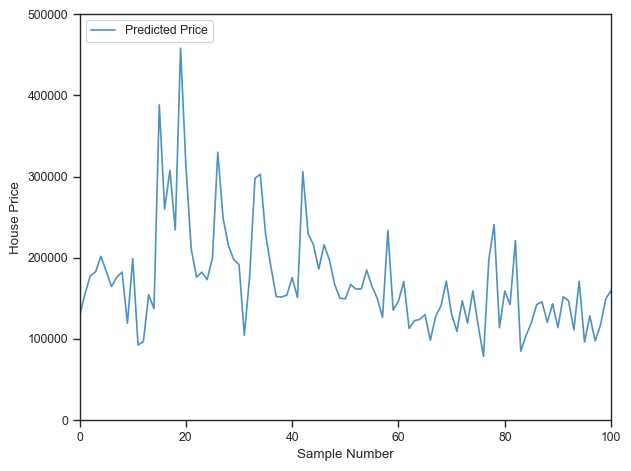

In [8]:
cmn.plot_observed_vs_predicted(predicted=y_predicted)

# Feature selection on Training Data

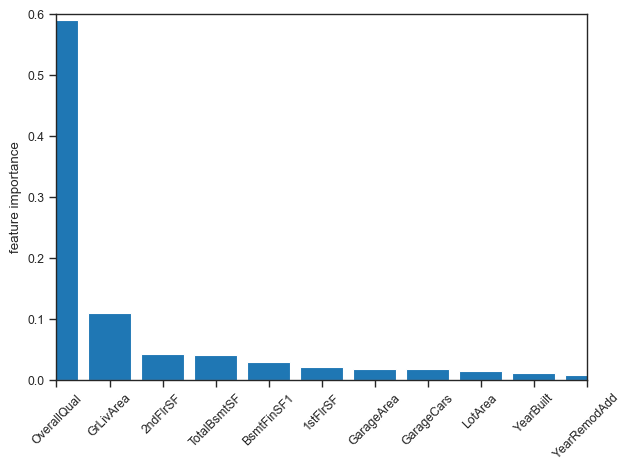

In [9]:
cmn.plot_feature_importance(x_val=X_train, forest=forest1, x_lim=10)

# Reverse Forest 50:50 split to verify the accuracy of the prediction

In [10]:
forest = RandomForestRegressor()
forest.fit(X_test, y_predicted)

RandomForestRegressor()

In [11]:
print("model score on training data:", forest.score(X_test, y_predicted))
print("model score on test data:", forest.score(X_train, y_train))

model score on training data: 0.9968417486348154
model score on test data: 0.85749593862934


In [12]:
y_train_predicted = forest.predict(X_train)

In [13]:
pd.DataFrame(y_train_predicted).to_csv(f"{cmn.export_data_path}RandomForestPrediction.csv")

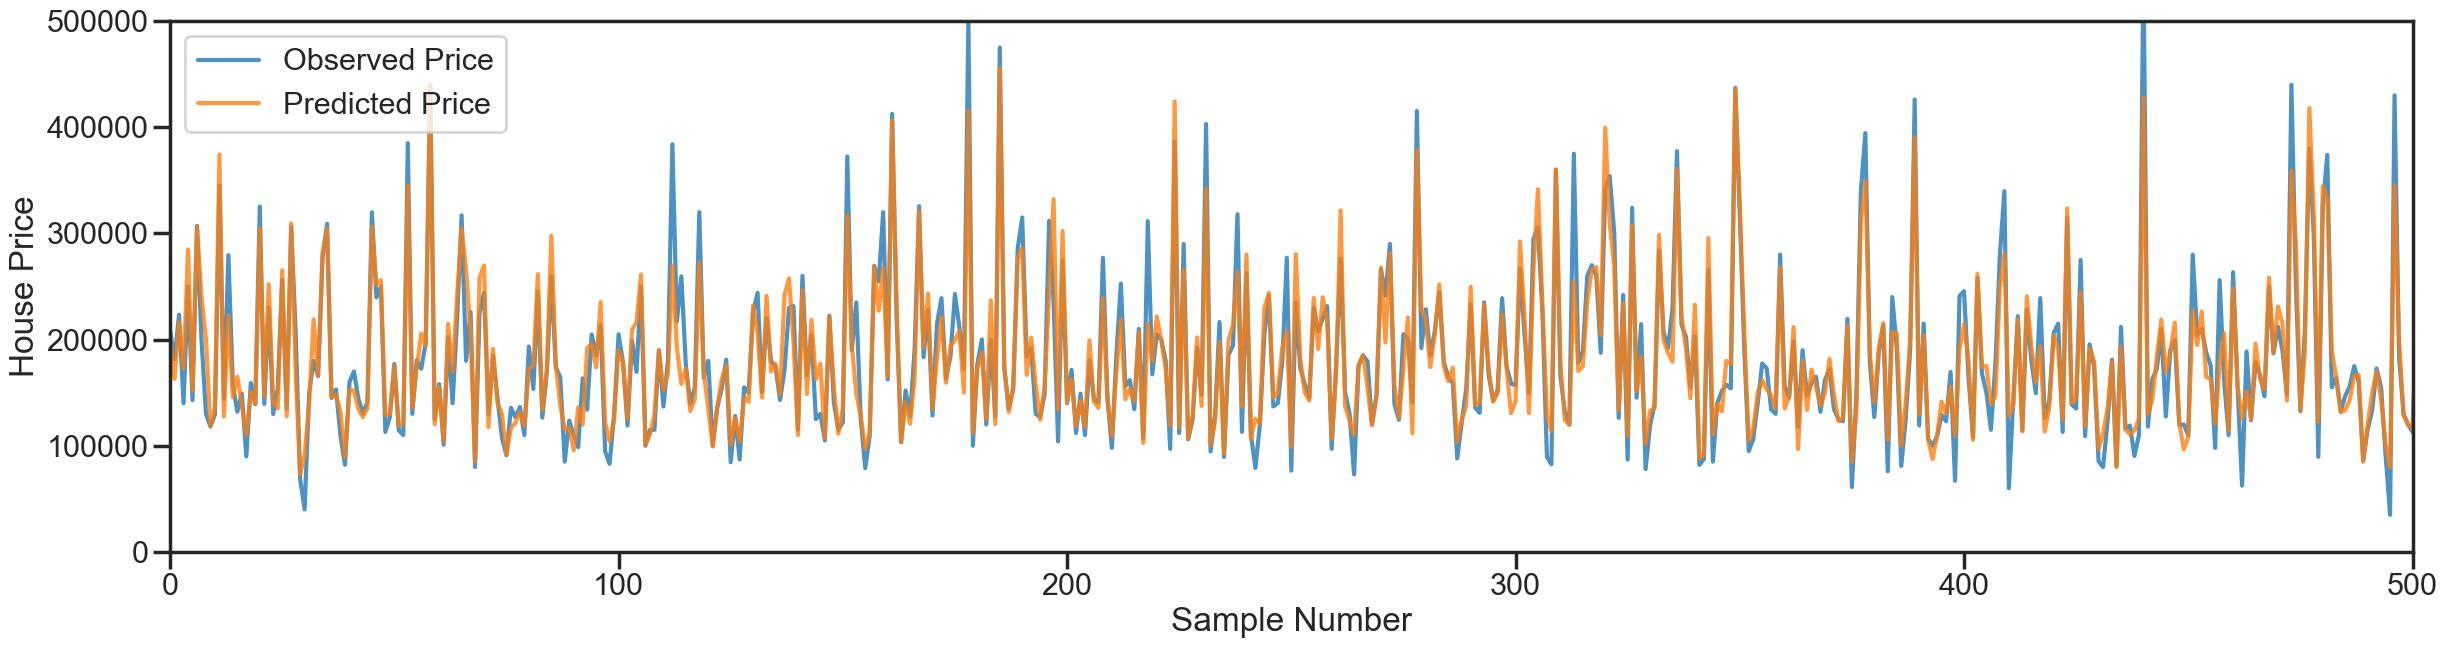

In [14]:
sns.set_context("poster")
sns.set_style("ticks")
cmn.plot_observed_vs_predicted(observed=y_train, predicted=y_train_predicted, x_lim=500, size_of_fig=(25,7))

# Feature Selection on reverse 50:50

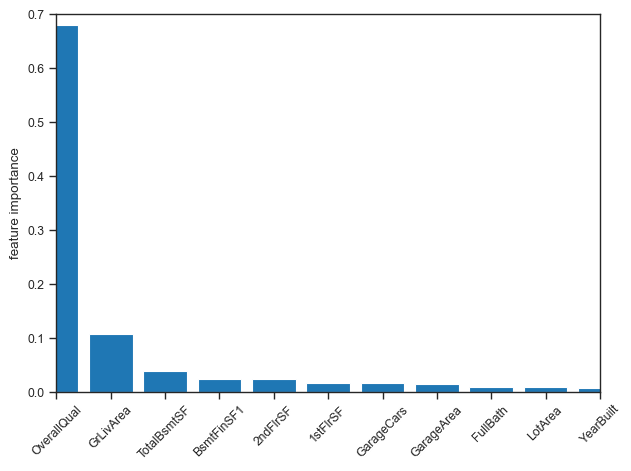

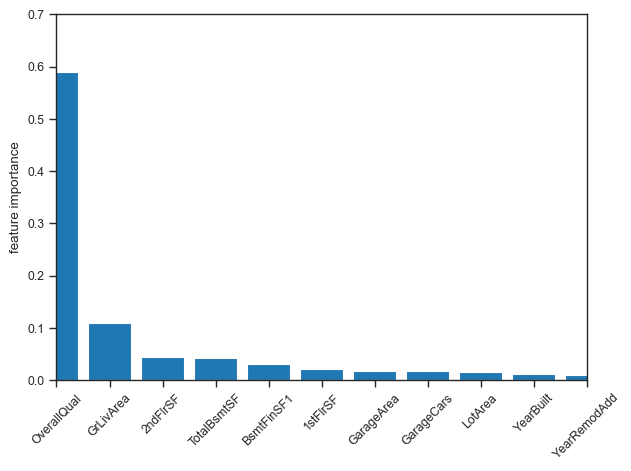

In [23]:
sns.set_context("paper")
sns.set_style("ticks")
cmn.plot_feature_importance(x_val=X_train, forest=forest, x_lim=10, y_lim=0.7)
cmn.plot_feature_importance(x_val=X_train, forest=forest1, x_lim=10, y_lim=0.7)
plt.show()

### Correlation Graph 50:50

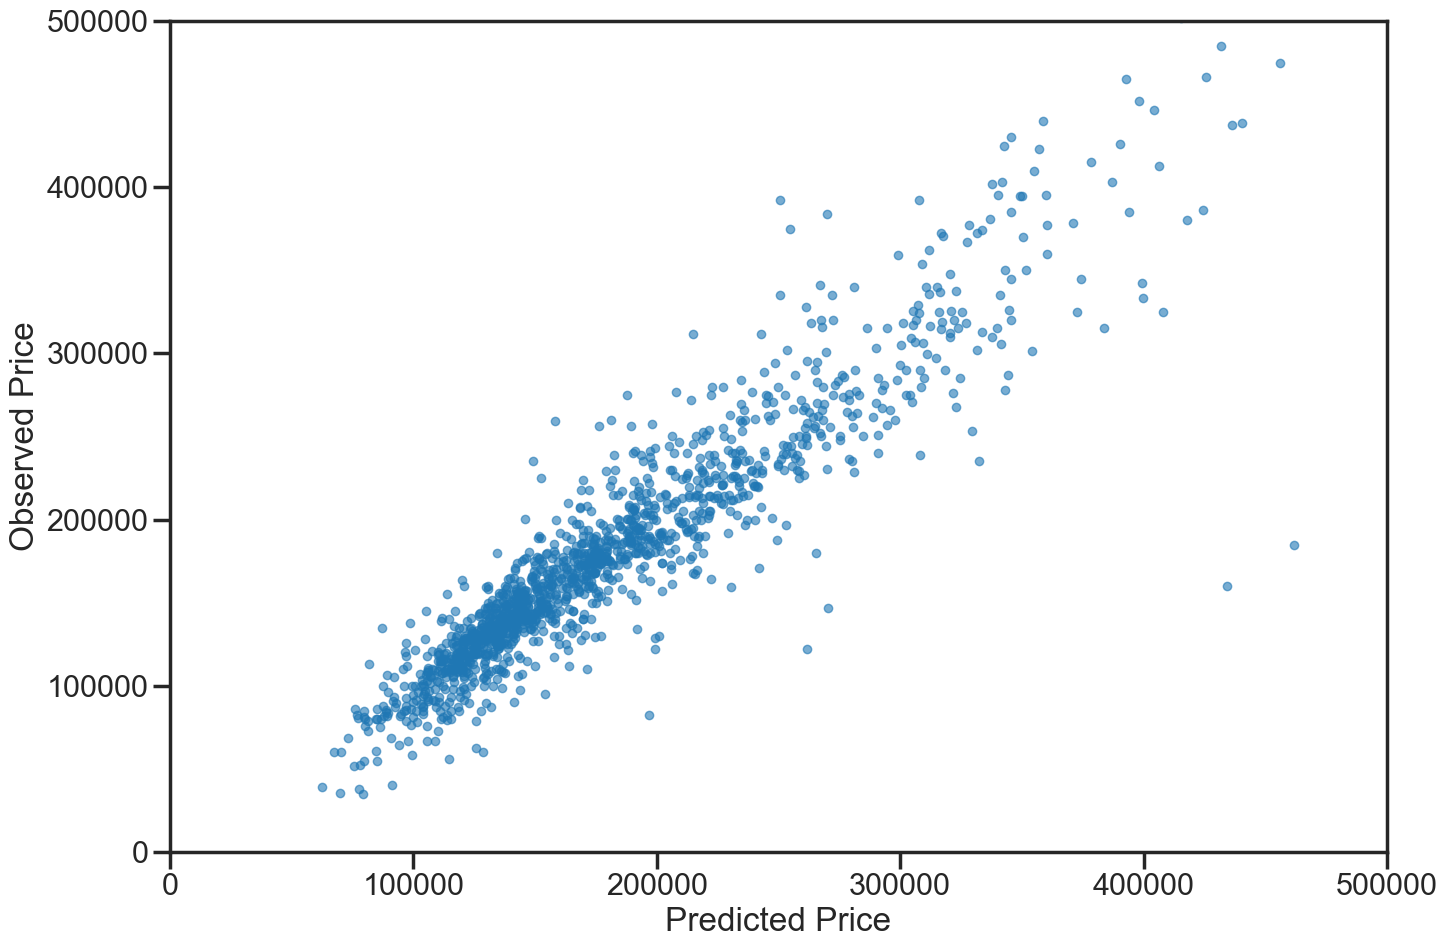

In [16]:
sns.set_context("poster")
sns.set_style("ticks")
cmn.plot_single_scatter(observed=y_train, predicted=y_train_predicted, x_lim=500000, y_lim=500000, size_of_fig=(15,10))

# -------------- Depreciated ------------
## We are not doing the reverse 75 split anymore, as it is not relevent for the data
### Forest 75:25 split to verify that the prediction is valid and comparing it to the original dataset that we had (first train without test data) - Ians first part

In [17]:
y_predicted = pd.DataFrame(y_predicted, columns = ['SalePrice'])
y_all_data = pd.concat((y_train, y_predicted)).reset_index(drop=True)
X_all_data = pd.concat((X_train, X_test)).reset_index(drop=True)
display(X_all_data.shape, X_all_data.head(), y_all_data.shape, y_all_data.head())

(2919, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,836.0,192,84,0,0,0,0,0,12,2008


(2919, 1)

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [18]:
X_train75, X_test75, y_train75, y_test75 = train_test_split(X_all_data,y_all_data, random_state=1, train_size=0.75)

In [19]:
forest = RandomForestRegressor()
forest.fit(X_train75, np.ravel(y_train75))

RandomForestRegressor()

In [20]:
print("model score on training data:", forest.score(X_train75, y_train75))
print("model score on test data:", forest.score(X_test75, y_test75))

model score on training data: 0.9891371646464338
model score on test data: 0.9243778114197927


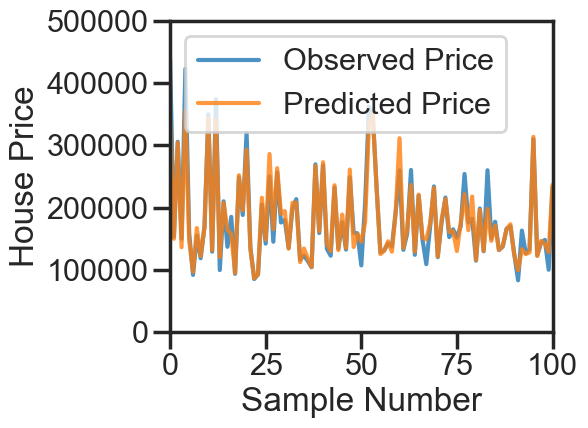

In [21]:
cmn.plot_observed_vs_predicted(observed=y_test75.to_numpy(), predicted=forest.predict(X_test75))

## Correlation Graph for 75:25

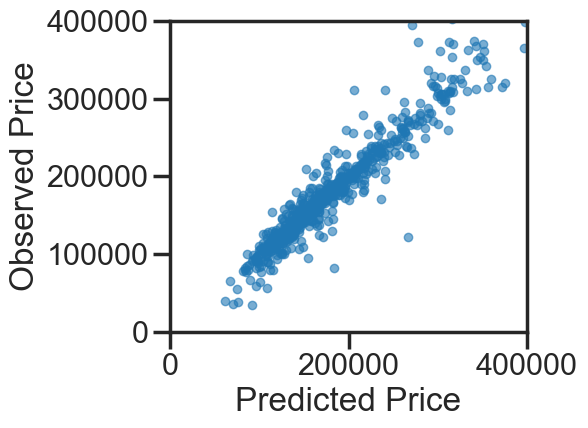

In [22]:
cmn.plot_single_scatter(observed=y_test75, predicted=forest.predict(X_test75), x_lim=400000, y_lim=400000)